# Asset Management HW2
## Yiwei Zhou,Peter David,Sujay Chebbi, Khoi Tran,Lai Jiang


In [88]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [89]:
# This is loading in all possible mutual funds (doesn't include performance metrics)
df = pd.read_csv('HW2_Data.csv')
df["caldt"] = pd.to_datetime(df["caldt"], format="%Y%m%d", errors="ignore").dt.to_period("M")
df = df.set_index("caldt")
df = df[df['lipper_class_name'] == 'Small-Cap Value Funds']
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cusip8,summary_period2,crsp_fundno,tna_latest,tna_latest_dt,crsp_portno,fund_name,merge_fundno,lipper_class_name
caldt,,,,,,,,,
1999-12,NaN,AQ,292,15.1,19991231.0,NaN,CitiFunds Trust II: CitiFunds Small Cap Value ...,NaN,Small-Cap Value Funds
2000-12,23294140,AQ,479,17.2,20001229.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds
1999-12,NaN,AQ,479,33.5,19991231.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds
1999-12,NaN,AQ,657,43.2,19991231.0,NaN,1838 Investment Advisors Funds: 1838 Small Cap...,NaN,Small-Cap Value Funds
1999-12,NaN,AQ,671,85.3,19991231.0,NaN,Evergreen Select Equity Trust: Evergreen Selec...,10551.0,Small-Cap Value Funds


In [90]:
# This includes monthly returns
performance = pd.read_csv('monthly.csv')
performance["caldt"] = pd.to_datetime(performance["caldt"], format="%Y%m%d", errors="ignore").dt.to_period("M")
performance = performance.set_index("caldt")

performance = performance[performance['mret'] != 'R']
performance['mret'] = performance['mret'].apply(float)
performance
performance = performance.groupby(['crsp_fundno'])[['mret']].mean()
new = df2.merge(performance, left_on='crsp_fundno',
                                   right_on='crsp_fundno',
                                   suffixes=['_df', '_performance'])
#new.sort_values(by = 'tna_latest')
new = new[new['tna_latest'].notna()]
new = new[new['crsp_fundno'] != 22169]
new['aret'] = (1 + new['mret'])**12 - 1
new.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cusip8,summary_period2,crsp_fundno,tna_latest,tna_latest_dt,crsp_portno,fund_name,merge_fundno,lipper_class_name,mret,aret
0,NaN,AQ,292,15.1,19991231.0,NaN,CitiFunds Trust II: CitiFunds Small Cap Value ...,NaN,Small-Cap Value Funds,-0.009159,-0.104539
1,23294140,AQ,479,17.2,20001229.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147
2,NaN,AQ,479,33.5,19991231.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147
3,NaN,AQ,657,43.2,19991231.0,NaN,1838 Investment Advisors Funds: 1838 Small Cap...,NaN,Small-Cap Value Funds,0.002988,0.036455
4,NaN,AQ,671,85.3,19991231.0,NaN,Evergreen Select Equity Trust: Evergreen Selec...,10551.0,Small-Cap Value Funds,-0.003488,-0.041060


Text(0.5, 1.0, 'Small-Cap Value - Performance and Size')

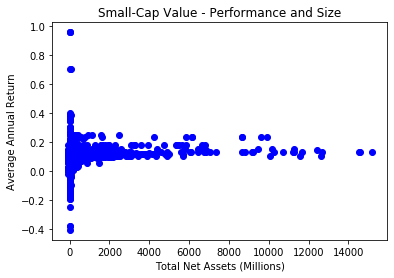

In [91]:
plot(new['tna_latest'], new['aret'], marker='o', color='blue', linestyle='None')
xlabel('Total Net Assets (Millions)')
ylabel('Average Annual Return')
title('Small-Cap Value - Performance and Size')

In [92]:
new.head()

,cusip8,summary_period2,crsp_fundno,tna_latest,tna_latest_dt,crsp_portno,fund_name,merge_fundno,lipper_class_name,mret,aret
0,NaN,AQ,292,15.1,19991231.0,NaN,CitiFunds Trust II: CitiFunds Small Cap Value ...,NaN,Small-Cap Value Funds,-0.009159,-0.104539
1,23294140,AQ,479,17.2,20001229.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147
2,NaN,AQ,479,33.5,19991231.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147
3,NaN,AQ,657,43.2,19991231.0,NaN,1838 Investment Advisors Funds: 1838 Small Cap...,NaN,Small-Cap Value Funds,0.002988,0.036455
4,NaN,AQ,671,85.3,19991231.0,NaN,Evergreen Select Equity Trust: Evergreen Selec...,10551.0,Small-Cap Value Funds,-0.003488,-0.041060


In [93]:
new['tna_latest'] = new['tna_latest'].apply(float)


In [94]:

new['binned_tna_latest'] = pd.cut(new['tna_latest'], [0, 3000, 6000, 9000, 12000, 16000]
                                  , labels=['0-3000', '3000-6000', '6000-9000', '9000-12000', '12000-16000'],
                                 include_lowest=True)
new.head()

,cusip8,summary_period2,crsp_fundno,tna_latest,tna_latest_dt,crsp_portno,fund_name,merge_fundno,lipper_class_name,mret,aret,binned_tna_latest
0,NaN,AQ,292,15.1,19991231.0,NaN,CitiFunds Trust II: CitiFunds Small Cap Value ...,NaN,Small-Cap Value Funds,-0.009159,-0.104539,0-3000
1,23294140,AQ,479,17.2,20001229.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147,0-3000
2,NaN,AQ,479,33.5,19991231.0,NaN,The DLB Fund Group: DLB Enterprise III Fund,NaN,Small-Cap Value Funds,0.006290,0.078147,0-3000
3,NaN,AQ,657,43.2,19991231.0,NaN,1838 Investment Advisors Funds: 1838 Small Cap...,NaN,Small-Cap Value Funds,0.002988,0.036455,0-3000
4,NaN,AQ,671,85.3,19991231.0,NaN,Evergreen Select Equity Trust: Evergreen Selec...,10551.0,Small-Cap Value Funds,-0.003488,-0.041060,0-3000


In [95]:
import matplotlib.pyplot as plt

def avg(s):
    return sum(s)/len(s)

avg_aret = new.groupby(['binned_tna_latest'])[['aret']].mean()
std_aret = new.groupby(['binned_tna_latest'])[['aret']].std()
avg_aret

,aret
binned_tna_latest,
0-3000,0.100473
3000-6000,0.136897
6000-9000,0.161652
9000-12000,0.145899
12000-16000,0.129144


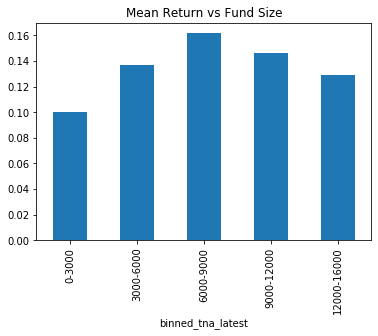

In [97]:
# plot average return bar plot
avg_aret['aret'].plot(kind='bar', title = 'Mean Return vs Fund Size')


In [99]:
std_aret

,aret
binned_tna_latest,
0-3000,0.044954
3000-6000,0.033008
6000-9000,0.042036
9000-12000,0.039612
12000-16000,0.013044


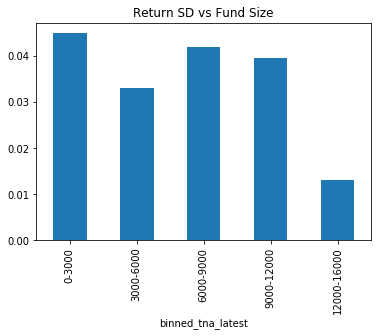

In [100]:
# plot std bar plot
std_aret['aret'].plot(kind='bar', title = 'Return SD vs Fund Size')

In [123]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [124]:
# t-test between size 0-3000 and size 3000-6000
df_3000 = new[new['binned_tna_latest'] == '0-3000']
df_6000 = new[new['binned_tna_latest'] == '3000-6000']
independent_ttest(df_3000['aret'], df_6000['aret'], 0.05)

(-7.748793855391789, 6664, 1.64508231576981, 1.0658141036401503e-14)

In [125]:
new['tna_latest_size'] = pd.cut(new['tna_latest'], [0, 8000, 16000]
                                  , labels=['0-8000', '8000-16000'],
                                 include_lowest=True)

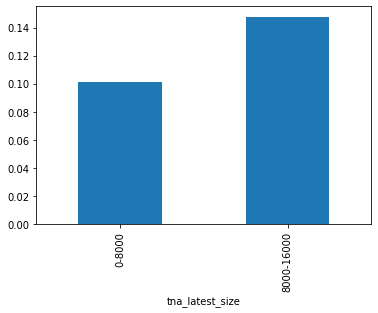

In [127]:
# plot average return bar plot
avg_aret['aret'].plot(kind='bar')

In [128]:
# t-test between size 0-9000 and size 9000-18000
df_small = new.loc[(new.binned_tna_latest == '0-3000') | (new.binned_tna_latest == '3000-6000') | (new.binned_tna_latest == '6000-9000')]
df_big = new.loc[(new.binned_tna_latest == '9000-12000') | (new.binned_tna_latest == '12000-15000') | (new.binned_tna_latest == '15000-18000')]

p = independent_ttest(df_small['aret'], df_big['aret'], 0.05)
print("T-test provides a p_value of ", p[3], '\n'
      "Mean return difference between small and large size funds is statistically significant.")

T-test provides a p_value of  2.2276380167607357e-05 
Mean return difference between small and large size funds is statistically significant.


Mean return of small size funds (0-9000K total net assets) is statistically different (smaller) from the mean return of large size funds (9000-16000K total net assets)

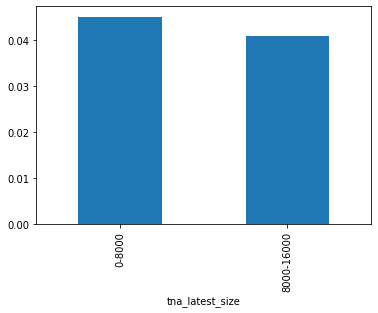

In [129]:
# plot std bar plot
std_aret['aret'].plot(kind='bar')

In [130]:
import scipy
from scipy.stats import f

# F-test between size 0-9000 and size 9000-18000
F = var(df_small['aret']) / var(df_big['aret'])
alpha = 0.05
df1 = len(df_small['aret']) - 1
df2 = len(df_big['aret']) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)
print("F-test provides a p_value of ", p_value, '\n'
      "Variance difference between small and large size funds are not statistically significant.")

F-test provides a p_value of  0.7482692978333005 
Variance difference between small and large size funds are not statistically significant.
